## Radioactive decay main program

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils.plot import setup_mpl

setup_mpl(as_default=0)

In [79]:
## euler method
def calculate(n_uranium,tau,dt,n,t):
    for i in range(n-1):
        n_uranium[i+1] = n_uranium[i] - (n_uranium[i]/tau)*dt
        t[i+1] = t[i] + dt
    return n_uranium,t

def main(n = 100, dt = 0.05, tau = 1):
    n_uranium = np.zeros(n)
    t = np.zeros(n)
    n_uranium[0] = n # initial number of uranium
    n_uranium,t = calculate(n_uranium,tau,dt,n,t)
    return n_uranium,t

ls_dt = [ main(n = 100, dt = 0.05, tau = 1),
      main(n = 100, dt = 0.1, tau = 1),
      main(n = 100, dt = 0.5, tau = 1)]
label_dt = ['dt=0.05','dt=0.1','dt=0.5']

ls_tau = [
    main(n = 100, dt = 0.1, tau = 0.5),
      main(n = 100, dt = 0.1, tau = 1),
      main(n = 100, dt = 0.1, tau = 2)]
label_tau = ['tau=0.5','tau=1','tau=2']

In [80]:
# ODE solution function
def decay(n_uranium, tau, t):
    return n_uranium * np.exp(-t / tau)

def func(n = 100, dt = 0.05, tau = 1):
    t = np.zeros(n)
    n_uranium = np.zeros(n)
    n_uranium[0] = n
    for i in range(n-1):
        t[i+1] = t[i] + dt
        n_uranium[i+1] = decay(n_uranium[0], tau, t[i+1])
    return n_uranium,t

ls_funcdt = [ func(n = 100, dt = 0.05, tau = 1),
             func(n = 100, dt = 0.1, tau = 1),
             func(n = 100, dt = 0.5, tau = 1)]

ls_functau = [func(n = 100, dt = 0.1, tau = 0.5),
              func(n = 100, dt = 0.1, tau = 1),
              func(n = 100, dt = 0.1, tau = 2)]


(-1.0, 10.0)

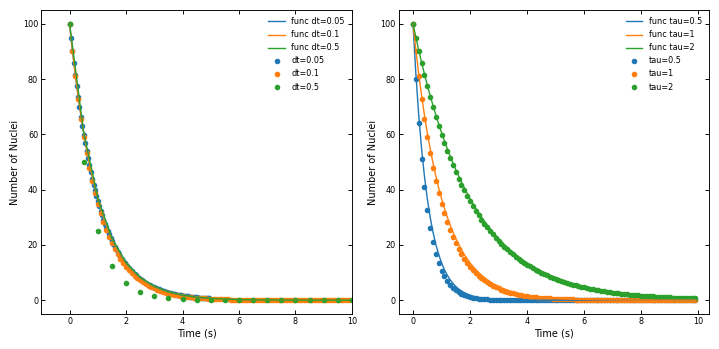

In [83]:
fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)
cmap = plt.get_cmap("tab10")

for i in range(3):
    ax[0].scatter(ls_dt[i][1],ls_dt[i][0],marker='.',color=cmap(i),label=label_dt[i])
    ax[0].plot(ls_funcdt[i][1],ls_funcdt[i][0],marker='',color=cmap(i),label='func '+label_dt[i])
    ax[1].scatter(ls_tau[i][1],ls_tau[i][0],marker='.',color=cmap(i),label=label_tau[i])
    ax[1].plot(ls_functau[i][1],ls_functau[i][0],marker='',color=cmap(i),label='func '+label_tau[i])

for i in range(2):
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Number of Nuclei')
    ax[i].legend(frameon=False)
ax[0].set_xlim(-1,10)

## Exercises

###  1.1 Freely falling

- $\frac{dv}{dt} = -g$
- $v = v_0 - gt$


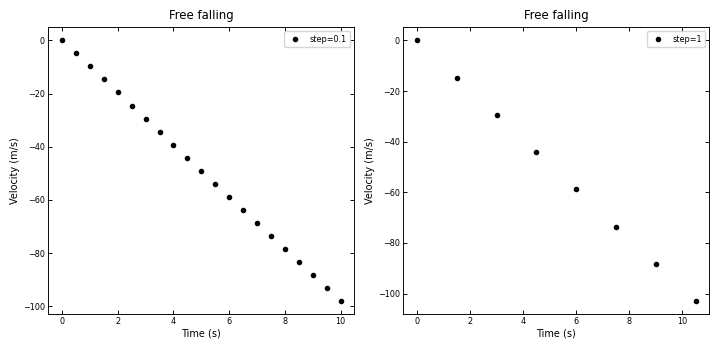

In [116]:
step = 0.01

def free_falling(step=0.01):
    t = np.arange(0, 10+step, step)
    n_step = len(t)
    v = np.zeros(n_step)
    g = 9.8
    for i in range(n_step):
        v[i] = -g*t[i]
    return t, v

fig,ax = plt.subplots(1,2,figsize=(3.60236*2,3.5),dpi=100)

t,v = free_falling(step=0.5)
ax[0].scatter(t,v,marker='.',color='k',label="step=0.1")
t,v = free_falling(step=1.5)
ax[1].scatter(t,v,marker='.',color='k',label="step=1")

for i in range(2):
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Velocity (m/s)")
    ax[i].set_title("Free falling")
    ax[i].legend()

### 1.2  object moving horizontally

$x = v t$